In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt

# set the CARMA model parameters
sigmay = 2.3  # dispersion in the time series
p = 6 # order of the AR polynomial
mu = 17.0  # mean of the time series
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0])  # widths of of Lorentzian components
qpo_cent = np.array([1.0/5.0, 1.0/25.0])  # centroids of Lorentzian components
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) # compute the roots r_k from the Lorentzian function parameters
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
# convert CARMA model variance to variance in the driving white noise
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)  # carma_

Text(0,0.5,'magnitud')

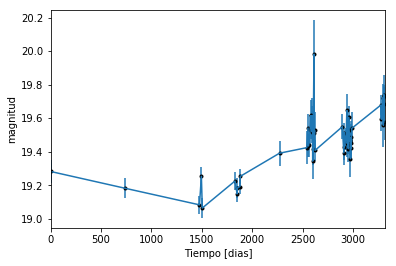

In [2]:
data = np.genfromtxt('LC_Z_141827.dat')
juldate = data[:,0]  # time is given by the julian date
t = juldate - juldate.min()  # set first time value to zero for convenience. units of t are days.
y = data[:,1]  # i-band magnitudes
yerr = data[:,2]  # standard deviation in the measurement noise

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=6, q=4)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

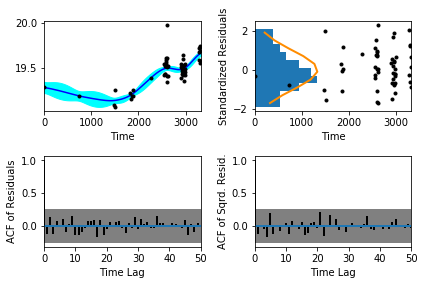

In [5]:
sample.assess_fit()

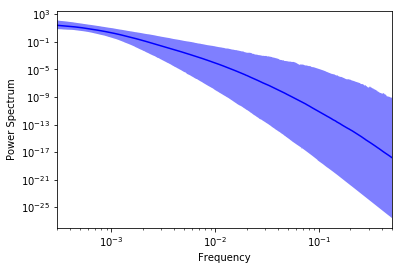

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.573591,'Nivel de ruido')

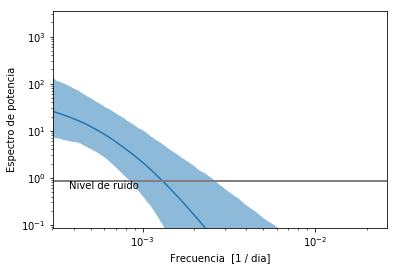

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

In [9]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [10]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 6)

In [11]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 193.25775391
Median: 0.0188281463628
Standard deviation: 0.261859051283
68% credibility interval: [ 0.         0.4448992]
95% credibility interval: [ 0.          0.90658252]
99% credibility interval: [ 0.          0.98178072]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 193.25775391
Median: 0.0188281463628
Standard deviation: 0.261859051283
68% credibility interval: [ 0.         0.4448992]
95% credibility interval: [ 0.          0.90658252]
99% credibility interval: [ 0.          0.98178072]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 517.257250767
Median: 0.0
Standard deviation: 0.0601711446788
68% credibilit

Plotting parameter summary


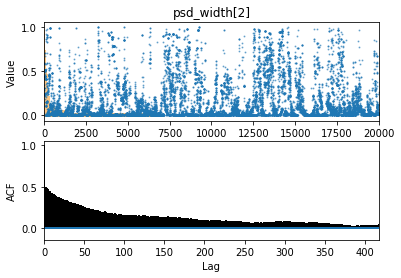

In [12]:
sample.plot_parameter('psd_width', 2, doShow=True)

In [13]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [14]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 822.468975789
Median: 78.2482143159
Standard deviation: 1.64447228069
68% credibility interval: [ 76.42619388  79.43043382]
95% credibility interval: [ 73.74086973  80.04647546]
99% credibility interval: [ 71.6917338   80.23496521]


In [15]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 7)

In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 695.967251832
Median: 1.79738334761
Standard deviation: 2.81073016192
68% credibility interval: [ 0.31930422  5.70940225]
95% credibility interval: [ 0.04185245  9.93760391]
99% credibility interval: [  0.0229609   12.86861371]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 908.188742683
Median: 2.28771608387
Standard deviation: 11.9468080542
68% credibility interval: [  0.13152932  16.72448558]
95% credibility interval: [  1.14992427e

In [17]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 5)

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1855.37965763
Median: 1.39237149262e-31
Standard deviation: 0.393397030029
68% credibility interval: [  2.46683922e-51   1.06251769e-15]
95% credibility interval: [  2.43206387e-92   2.01240859e-04]
99% credibility interval: [  1.32927074e-105   8.86875352e-002]
Posterior summary for parameter ma_coefs  element 2
----------------------------------------------
Effective number of independent samples: 20020.0914979
Median: 2.86510873317e-35
Standard deviation: 7890423.73187
68% credibility interval: [  6.88221529e-70   6.4428815

In [19]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1264.45730752
Median: 19.3612698653
Standard deviation: 0.135446363504
68% credibility interval: [ 19.25547841  19.47859048]
95% credibility interval: [ 19.10245693  19.65588176]
99% credibility interval: [ 18.9916958   19.84678559]


In [21]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 6)

In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 193.25775391
Median: 0.0188281463628
Standard deviation: 0.261859051283
68% credibility interval: [ 0.         0.4448992]
95% credibility interval: [ 0.          0.90658252]
99% credibility interval: [ 0.          0.98178072]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 193.25775391
Median: 0.0188281463628
Standard deviation: 0.261859051283
68% credibility interval: [ 0.         0.4448992]
95% credibility interval: [ 0.          0.90658252]
99% credibility interval: [ 0.          0.98178072]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 517.257250767
Median: 0.0
Standard deviation: 0.0601711446788
68% credibilit

In [23]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [24]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 822.468975789
Median: 78.2482143159
Standard deviation: 1.64447228069
68% credibility interval: [ 76.42619388  79.43043382]
95% credibility interval: [ 73.74086973  80.04647546]
99% credibility interval: [ 71.6917338   80.23496521]


In [25]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 6)

In [26]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 499.58372651
Median: 0.00950406974548
Standard deviation: 0.183616571931
68% credibility interval: [ 0.00082456  0.17602573]
95% credibility interval: [  3.40390363e-04   7.14895553e-01]
99% credibility interval: [  3.07443140e-04   9.45058612e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 303.00668307
Median: 0.0015655338788
Standard deviation: 0.0986974575568
68% credibility interval: [ 0.00042377  0.03384997]
95% credibility interval: [ 0.00031659  0.31239041]
99% credibility interval: [  3.04183862e-04   7.20075585e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 239.466046038
Median: 0.0271546997096
Standard de

In [27]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [28]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1332.81551981
Median: 0.0403405454403
Standard deviation: 0.057546332685
68% credibility interval: [ 0.02174151  0.08234382]
95% credibility interval: [ 0.01343061  0.19974583]
99% credibility interval: [ 0.01027012  0.41383535]


In [29]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [30]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1681.90356949
Median: 0.989142291711
Standard deviation: 0.148023395238
68% credibility interval: [ 0.8612384   1.14651114]
95% credibility interval: [ 0.75415096  1.33340154]
99% credibility interval: [ 0.69270771  1.46668963]


In [31]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [32]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 2217.92678178
Median: 1.11215679273e-06
Standard deviation: 0.0880536201193
68% credibility interval: [  5.04904606e-09   1.96386464e-04]
95% credibility interval: [  5.93122805e-11   6.83417016e-03]
99% credibility interval: [  4.66462060e-12   5.61870373e-02]


In [33]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 6)

In [34]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 499.58372651
Median: (-0.0597158313832-2.60181364082j)
Standard deviation: 2.00949201668
68% credibility interval: [-1.10600229-3.18023161j -0.00518087-0.6117487j ]
95% credibility interval: [ -4.49182123e+00+0.j          -2.13873573e-03-0.20195785j]
99% credibility interval: [ -5.93797838e+00+0.j          -1.93172222e-03-3.71995957j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 303.00668307
Median: (-0.00983653946519+1.09321942824j)
Standard deviation: 1.75829696374
68% credibility interval: [-0.21268561+0.19008403j -0.00266260+0.00265193j]
95% credibility interval: [-1.96280681+0.8997287j  -0.00198918+0.20518534j]
99% credibility interval: [ -4.52436834e+00+1.39106547j  -1.91124357e-03+0.j        ]
Posterior summa

Plotting 2d PDF w KDE


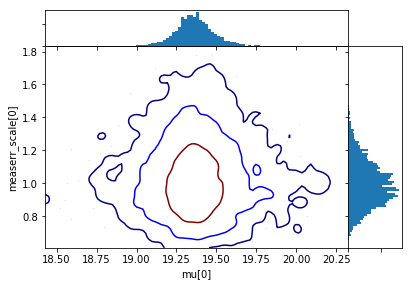

In [35]:
sample.plot_2dkde('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


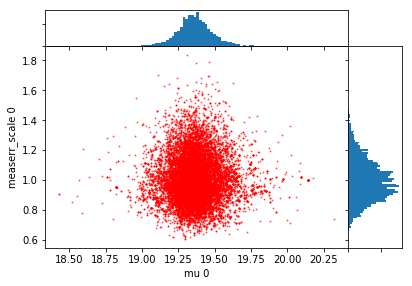

In [36]:
sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


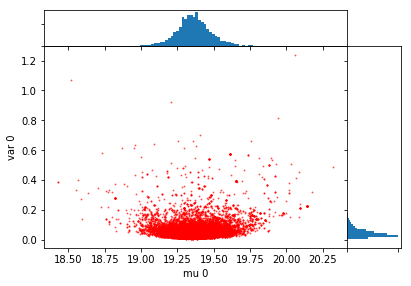

In [37]:
sample.plot_2dpdf('mu', 'var', doShow=True)

Plotting 2d PDF w KDE


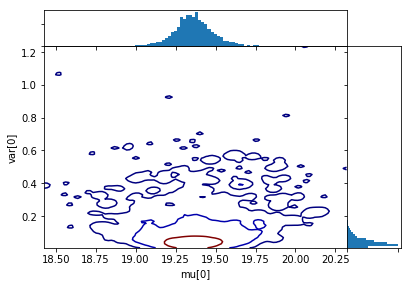

In [38]:
sample.plot_2dkde('mu', 'var', doShow=True)

Text(0.5,1,'Interpolacion, camino simulado')

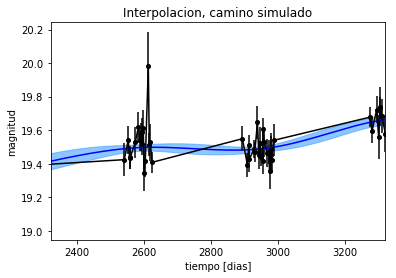

In [39]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')